## Customer Segmentation based on engagement

In [16]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from io import StringIO
from IPython.display import Image  
import pydotplus
import graphviz
import os  

In [2]:
users = pd.read_csv('users.csv', header=0)
users.rename(columns={ "id": "user_id"}, inplace = True)

pois = pd.read_csv('pois.csv', header=0)
pois.rename(columns={ "id": "poi_id"}, inplace = True)

categories = pd.read_csv('categories.csv', header=0)
categories.rename(columns={ "id": "category_id", "title": "category"}, inplace = True)

walkins = pd.read_csv('walkins.csv', header=0)
walkins.rename(columns={ "id": "walkins_id"}, inplace = True)

We will merge all the data in a dataframe.

In [3]:
cat_pois = pd.merge(pois, categories, on = 'category_id', how = 'inner')

user_walk = pd.merge(users, walkins, on = 'user_id', how = 'inner')

data = pd.merge(cat_pois, user_walk, on = 'poi_id', how = 'inner')
data = data.astype(str)
data = data.astype({"points": int})
data.head(5)

,poi_id,title,address,latitude,longitude,category_id,category,user_id,points,walkins_id,created
0,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,8635,3972,248257,2020-10-18
1,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,12,1490,248309,2020-10-18
2,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,30,2640,248339,2020-10-18
3,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,38,237,248264,2020-10-18
4,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,70,3556,248364,2020-10-18


#### Cities

We need to add a new column "city", extracted from the addresses.

In [4]:
c = pd.DataFrame(data.address.unique())
c['Larissa'] =  c[0].str.contains('Larissa')
c['Patra'] =  c[0].str.contains('Patra|ΠΑΤΡΑ|Πάτρα|Πατρών')
c['Thessaloniki'] =  c[0].str.contains('Thessaloniki|ΘΕΣΣΑΛΟΝΙΚΗΣ')
c['Kalamata'] =  c[0].str.contains('Kalamata')
c['Crete'] =  c[0].str.contains('Heraklion|Iraklio|Crete')
c['Naxos'] =  c[0].str.contains('Naxos')
c['Attica'] =  c[0].str.contains('Attica|Pireas|Piraeus|Rentis|Renti|Nikaia|Peiraias|Kaminia|Kalivia|Athina|Athens|Athinon|Αθήνα|Agiou Dimitriou 305|Elliniko|Leof. Irakleiou|141 22|Glifada|Kamatero|Nera|Alimos|Anthoupoli|Pallini|Koukaki|Patision|Acharne|Petralona|Liosia|Psichiko|Aigaleo|Αιγάλεω|Μαρούσι|Psihiko|Κηφισιά|Galatsi|Holargos|Ilioupoli|Kalamaki|Cholargos|Gizi|Anoixi|Korydalos|Argyroupoli|Gerakas|Erithraia|Pefki|Nea Penteli|Filadelfeia|Ag. Varvara|Faliro|Agios Dimitrios|Agios Dimitros|Smyrni|Goudi|Kallithea|Peristeri|Kifisia|Glyfada|Acharnes|Voula|Vironas|Erithrea|Psychiko|Agia Paraskevi|Egaleo|Filadelfia|Korydallos|Halandri|Zografou|Haidari|Metamorfosi|Argiroupoli|Vrilissia|Chalandri|Nea Smirni|Petroupoli|Nea Ionia|Paraskevi|Melissia|Vouliagmeni|Kifissia|Anargyroi|Anargiroi| Ag. Dimitrios|Glyka Nera|Moschato|Marousi|Dafni|Menidi|Kaisariani|Agios Stefanos|Perissos|Tavros|Likovrisi|Ilion|Patisia|Markopoulo|Peania|Loutsa|Koropi|Schoinia|Nea Makri|Spata|Agia Marina|Keratea|Sounio')
c['Karditsa'] =  c[0].str.contains('Karditsa')
c['Volos'] =  c[0].str.contains('Volos|Volou')
c['Veria'] =  c[0].str.contains('Veria')
c['Egio'] =  c[0].str.contains('Egio')
c['Salamina'] =  c[0].str.contains('Salamina')
c['Aliveri'] =  c[0].str.contains('Aliveri')
c['Nafplio'] =  c[0].str.contains('Nafplio')
c['Drapetsona'] =  c[0].str.contains('Drapetsona')
c['Aspropirgos'] =  c[0].str.contains('Aspropirgos')
c['Edessa'] =  c[0].str.contains('Edessa')
c['Korinthos'] =  c[0].str.contains('Korinthos')
c['Oinofita'] =  c[0].str.contains('Oinofita')
c['Lefkada'] =  c[0].str.contains('Perivolia|Lefkada')
c['Karpenisi'] =  c[0].str.contains('Karpenisi')
c['Lamia'] =  c[0].str.contains('Lamia')
c['Magnisia'] =  c[0].str.contains('Magnisia')
c['Rodos'] =  c[0].str.contains('Rodos|Paradisi')
c['Kamena Vourla'] =  c[0].str.contains('Kamena Vourla')
c['Poros'] =  c[0].str.contains('Poros')
c['Leros'] =  c[0].str.contains('Leros')
c['Chalkida'] =  c[0].str.contains('Chalkida')
c['Giannitsa'] =  c[0].str.contains('Giannitsa')
c['Drama'] =  c[0].str.contains('Drama')
c['Milos'] =  c[0].str.contains('Milos')
c['Igoumenitsa'] =  c[0].str.contains('Igoumenitsa')
c['Aspropyrgos'] =  c[0].str.contains('Aspropyrgos')
c['Imittos'] =  c[0].str.contains('Imittos')

c.rename(columns={ 0: "address"}, inplace = True)

c['city'] = c.__eq__(True).apply(lambda x: x.index[x].tolist(), axis=1)
c.head(2)

,address,Larissa,Patra,Thessaloniki,Kalamata,Crete,Naxos,Attica,Karditsa,Volos,...,Poros,Leros,Chalkida,Giannitsa,Drama,Milos,Igoumenitsa,Aspropyrgos,Imittos,city
0,"Kouma 17, Larissa, Larissa",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,[Larissa]
1,"Platonos 2, Halandri, Attica",False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,[Attica]


In [5]:
c =c[['address', 'city']]
c.loc[:, 'city'] = c.city.map(lambda x: x[0])
c.head(2)

,address,city
0,"Kouma 17, Larissa, Larissa",Larissa
1,"Platonos 2, Halandri, Attica",Attica


...and merge with our data

In [7]:
ct_data = pd.merge(data, c, on = 'address', how='inner')
ct_data.head(2)

,poi_id,title,address,latitude,longitude,category_id,category,user_id,points,walkins_id,created,city
0,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,8635,3972,248257,2020-10-18,Larissa
1,f8e90332-fab5-4ad7-a1bb-8888e9e8155d,Cosmos Sport Larissa,"Kouma 17, Larissa, Larissa",39.63778204,22.41755328,23236726-0e6b-48ee-b5a0-dc33f0e36609,Shoe Store,12,1490,248309,2020-10-18,Larissa


We will keep the data that are intresting for our analysis.

In [8]:
ct_data = ct_data[['title', 'category', 'user_id', 'points', 'created', 'city']]
ct_data.head(2)

,title,category,user_id,points,created,city
0,Cosmos Sport Larissa,Shoe Store,8635,3972,2020-10-18,Larissa
1,Cosmos Sport Larissa,Shoe Store,12,1490,2020-10-18,Larissa


#### Category frequencies

For each user we will count the frequencies of category visits.

In [10]:
percateg = ct_data.pivot_table(index=['user_id', 'category'],  aggfunc = 'count').reset_index()
percateg['frequency'] = percateg['title']
percateg = percateg[['user_id', 'category', 'frequency']]
percateg.head(2)

,user_id,category,frequency
0,10,Airport,1
1,10,Bakery,8


Each row matches with a user:

In [12]:
percateg2 = percateg.pivot_table(index=['user_id'], columns = 'category', values = 'frequency').reset_index()
percateg2.fillna(0, inplace = True)
percateg3 = percateg2.copy()
percateg3.drop(columns = ['user_id'], inplace=True)
percateg3.head(2)

category,Airport,Bakery,Bank,Bar,Beach,Beach Bar,Beauty Store,Burgers,Bus Stop,Cafe,...,Souvlaki,Square,Steakhouse,Supermarket,Taverna,Theater,Transportation,University,Waffle House,Women's Store
0,1.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,...,0.0,19.0,0.0,41.0,0.0,0.0,0.0,12.0,0.0,1.0
1,2.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,4.0,...,0.0,18.0,0.0,31.0,0.0,0.0,0.0,12.0,0.0,11.0


We can now detect the most popular categories.

In [13]:
percateg3.sum().sort_values(ascending = False)

category
Supermarket          32390.0
Square               16159.0
Park                  8385.0
Cafe                  7631.0
University            7189.0
Metro Station         7094.0
Shopping Mall         7040.0
Beach                 6838.0
Women's Store         5825.0
Clothing Store        4873.0
Cultural Center       4553.0
Home Store            4337.0
Bakery                3741.0
Electronics Store     3016.0
Gym                   2826.0
Pet Store             2773.0
Shoe Store            2748.0
Museum                1973.0
Sandwich Place        1517.0
Ice Cream Shop        1304.0
Marina                1261.0
Airport               1144.0
Convenience Store     1017.0
Burgers                764.0
Bar                    737.0
Kids Store             611.0
Restaurant             518.0
General                439.0
Playground             432.0
Landmark               334.0
Cinema                 281.0
Gaming Cafe            279.0
Open Air Cinema        257.0
Waffle House           117.0
Libra

#### Clustering

We will use the PCA method in order to decrease the number of columns and be able to visualize our data.

In [15]:
pca = PCA(n_components=3)
X = pca.fit_transform(percateg3)
pca.explained_variance_ratio_

array([0.87576965, 0.03249303, 0.02538887])

Now we can use SpectralClustering with 3 clusters.

In [17]:
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           n_neighbors=20,
                           n_init=20,
                           assign_labels='kmeans',
                           random_state=0)
y_pred = model.fit_predict(X)

...and visualize the results.

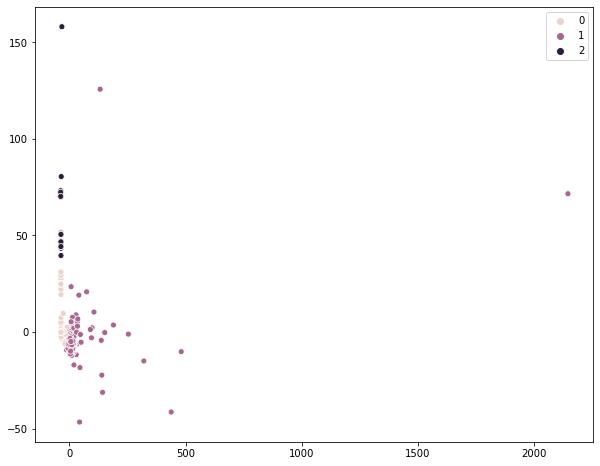

In [18]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)

In [20]:
clusters =pd.DataFrame(y_pred)
clusters.rename(columns={ 0: "cluster"}, inplace = True)

pc = pd.merge(percateg3, clusters, left_index=True, right_index=True)
pc.head(5)

,Airport,Bakery,Bank,Bar,Beach,Beach Bar,Beauty Store,Burgers,Bus Stop,Cafe,...,Square,Steakhouse,Supermarket,Taverna,Theater,Transportation,University,Waffle House,Women's Store,cluster
0,1.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,...,19.0,0.0,41.0,0.0,0.0,0.0,12.0,0.0,1.0,1
1,2.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,4.0,...,18.0,0.0,31.0,0.0,0.0,0.0,12.0,0.0,11.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,6.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,8.0,...,21.0,0.0,39.0,0.0,0.0,0.0,12.0,0.0,11.0,1


We can find out the sorted principal components of our analysis.

In [21]:
sorted_loadings = (-pca.components_).argsort()[0]
sorted_loadings

array([51, 31, 49, 39,  9,  1, 45, 22, 57, 12, 13, 17, 23, 46, 20, 47, 15,
       55,  7, 33, 11,  3,  2,  0, 41, 25, 32, 34, 27, 44, 21, 19, 35, 43,
        6,  5, 37, 30, 38, 16, 24, 28, 56, 14, 52, 18, 53, 48,  8, 50, 26,
       10, 29, 42, 40, 54, 36,  4], dtype=int64)

In [22]:
pc.columns[sorted_loadings[:20]]

Index(['Supermarket', 'Metro Station', 'Square', 'Pet Store', 'Cafe', 'Bakery',
       'Sandwich Place', 'Gym', 'Women's Store', 'Clothing Store',
       'Convenience Store', 'Electronics Store', 'Home Store', 'Shoe Store',
       'Gaming Cafe', 'Shopping Mall', 'Cultural Center', 'University',
       'Burgers', 'Museum'],
      dtype='object')

In [23]:
pc2 = pd.merge(percateg2, clusters, left_index=True, right_index=True)
pc2.head(2)

,user_id,Airport,Bakery,Bank,Bar,Beach,Beach Bar,Beauty Store,Burgers,Bus Stop,...,Square,Steakhouse,Supermarket,Taverna,Theater,Transportation,University,Waffle House,Women's Store,cluster
0,10,1.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,19.0,0.0,41.0,0.0,0.0,0.0,12.0,0.0,1.0,1
1,100,2.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,...,18.0,0.0,31.0,0.0,0.0,0.0,12.0,0.0,11.0,1


#### Consistency

We will call:
<br>
    the users in cluster 0 "consistent" clients
<br>
    the users in cluster 2 "less consistent" clients
<br>
    the users in cluster in "inconsistent" clients

In [24]:
def value_return(change_variable):

     if(change_variable==0):
          m='consistent'
     elif(change_variable==2):
          m='less consistent'
     else:
        m='inconsistent'
        
     return m

In [26]:
pc2['consistency']=pc2.apply(lambda row: value_return(row['cluster']),axis=1)
pc2.head(2)

,user_id,Airport,Bakery,Bank,Bar,Beach,Beach Bar,Beauty Store,Burgers,Bus Stop,...,Steakhouse,Supermarket,Taverna,Theater,Transportation,University,Waffle House,Women's Store,cluster,consistency
0,10,1.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,0.0,0.0,12.0,0.0,1.0,1,inconsistent
1,100,2.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,...,0.0,31.0,0.0,0.0,0.0,12.0,0.0,11.0,1,inconsistent


In [27]:
user_cons = pc2[['user_id', 'consistency']]
user_cons.head(2)

,user_id,consistency
0,10,inconsistent
1,100,inconsistent


Let's merge our data.

In [29]:
new_data = pd.merge(ct_data, user_cons, on='user_id', how = 'inner')
new_data.drop_duplicates(inplace = True)
new_data.head(5)

,title,category,user_id,points,created,city,consistency
0,Cosmos Sport Larissa,Shoe Store,8635,3972,2020-10-18,Larissa,inconsistent
1,Kalogirou Kifisia,Shoe Store,8635,3972,2020-10-05,Attica,inconsistent
2,Cosmos Sport Nea Erythraia,Shoe Store,8635,3972,2020-09-01,Attica,inconsistent
4,Cosmos Sport Kifisia,Shoe Store,8635,3972,2020-09-05,Attica,inconsistent
5,Cosmos Sport Kifisia,Shoe Store,8635,3972,2020-09-11,Attica,inconsistent


For each user we will count the cities he has visited the number of records.

In [32]:
ucp = new_data[['user_id', 'city', 'points']]

numofc = ucp.pivot_table(index=['user_id'], columns = 'city', values = 'points',  aggfunc = 'count').reset_index()

numofc['sum_visits'] = numofc.sum(axis=1)
numofc['city_count'] = numofc.count(axis=1) - 2
numofc.head(2)

city,user_id,Aliveri,Aspropirgos,Aspropyrgos,Attica,Chalkida,Crete,Drama,Drapetsona,Edessa,...,Oinofita,Patra,Poros,Rodos,Salamina,Thessaloniki,Veria,Volos,sum_visits,city_count
0,10,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0,136.0,4
1,100,NaN,NaN,NaN,128.0,NaN,NaN,1.0,NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,143.0,5


In [33]:
numofc = numofc[['user_id', 'sum_visits', 'city_count']]
numofc.head(5)

city,user_id,sum_visits,city_count
0,10,136.0,4
1,100,143.0,5
2,10037,1.0,1
3,10079,1.0,1
4,101,170.0,6


In [35]:
nd = pd.merge(new_data, numofc, on = 'user_id', how='inner')
nd = nd[['user_id', 'category', 'points', 'created', 'consistency', 'sum_visits', 'city_count']]
nd.head(5)

,user_id,category,points,created,consistency,sum_visits,city_count
0,8635,Shoe Store,3972,2020-10-18,inconsistent,161.0,6
1,8635,Shoe Store,3972,2020-10-05,inconsistent,161.0,6
2,8635,Shoe Store,3972,2020-09-01,inconsistent,161.0,6
3,8635,Shoe Store,3972,2020-09-05,inconsistent,161.0,6
4,8635,Shoe Store,3972,2020-09-11,inconsistent,161.0,6


We will also count the number of days the user has used the application.

In [36]:
tt = nd.loc[(nd.city_count > 1) & (nd.city_count < 4)]

days = tt[['user_id', 'created']]
days = days.drop_duplicates()

days.head(5)

,user_id,created
6753,278,2020-10-18
6754,278,2020-11-06
6755,278,2020-12-18
6756,278,2020-12-01
6757,278,2020-12-07


In [37]:
sum_days = days.pivot_table(index=['user_id'],  aggfunc = 'count').reset_index()
sum_days.rename(columns={ "created": "days"}, inplace = True)
sum_days.head(2)

,user_id,days
0,10163,2
1,11116,1


We can now create the final dataframe.

In [39]:
final = pd.merge(tt, sum_days, on = 'user_id', how = 'inner')
final['avg'] = final['sum_visits'] / final['days']
final.head(5)

,user_id,category,points,created,consistency,sum_visits,city_count,days,avg
0,278,Shoe Store,69,2020-10-18,inconsistent,168.0,3,72,2.333333
1,278,Shoe Store,69,2020-11-06,inconsistent,168.0,3,72,2.333333
2,278,Shoe Store,69,2020-12-18,inconsistent,168.0,3,72,2.333333
3,278,Supermarket,69,2020-12-01,inconsistent,168.0,3,72,2.333333
4,278,Supermarket,69,2020-12-07,inconsistent,168.0,3,72,2.333333


In [40]:
final.loc[final.consistency == 'inconsistent'].avg.mean()

4.475412476810842

We will call these users "potential consistent" clients

In [43]:
days = nd[['user_id', 'created']]
days = days.drop_duplicates()

sum_days = days.pivot_table(index=['user_id'],  aggfunc = 'count').reset_index()
sum_days.rename(columns={ "created": "days"}, inplace = True)

final = pd.merge(nd, sum_days, on = 'user_id', how = 'inner')
final['avg'] = final['sum_visits'] / final['days']
final

,user_id,category,points,created,consistency,sum_visits,city_count,days,avg
0,8635,Shoe Store,3972,2020-10-18,inconsistent,161.0,6,44,3.659091
1,8635,Shoe Store,3972,2020-10-05,inconsistent,161.0,6,44,3.659091
2,8635,Shoe Store,3972,2020-09-01,inconsistent,161.0,6,44,3.659091
3,8635,Shoe Store,3972,2020-09-05,inconsistent,161.0,6,44,3.659091
4,8635,Shoe Store,3972,2020-09-11,inconsistent,161.0,6,44,3.659091
...,...,...,...,...,...,...,...,...,...
120982,12172,Office,26,2020-10-13,consistent,1.0,1,1,1.000000
120983,12277,Office,132,2020-10-22,consistent,1.0,1,1,1.000000
120984,12325,Airport,29,2020-11-02,consistent,2.0,1,2,1.000000
120985,12325,Airport,29,2020-11-18,consistent,2.0,1,2,1.000000


Let's find the potential consistent clients.

In [44]:
tt = final.loc[(final.city_count > 1) & (final.city_count < 4)]
final.loc[(final.consistency == 'inconsistent') & (final.city_count > 1) & (final.city_count < 4), 'consistency'] = 'potential consistent'
final.loc[(final.consistency == 'inconsistent') & (final.avg > 4), 'consistency'] = 'potential consistent'
final.loc[(final.consistency == 'inconsistent') & (final.points > 2000), 'consistency'] = 'potential consistent'
final

,user_id,category,points,created,consistency,sum_visits,city_count,days,avg
0,8635,Shoe Store,3972,2020-10-18,potential consistent,161.0,6,44,3.659091
1,8635,Shoe Store,3972,2020-10-05,potential consistent,161.0,6,44,3.659091
2,8635,Shoe Store,3972,2020-09-01,potential consistent,161.0,6,44,3.659091
3,8635,Shoe Store,3972,2020-09-05,potential consistent,161.0,6,44,3.659091
4,8635,Shoe Store,3972,2020-09-11,potential consistent,161.0,6,44,3.659091
...,...,...,...,...,...,...,...,...,...
120982,12172,Office,26,2020-10-13,consistent,1.0,1,1,1.000000
120983,12277,Office,132,2020-10-22,consistent,1.0,1,1,1.000000
120984,12325,Airport,29,2020-11-02,consistent,2.0,1,2,1.000000
120985,12325,Airport,29,2020-11-18,consistent,2.0,1,2,1.000000


#### Decision Tree

In [70]:
treed = final[['points','city_count', 'sum_visits', 'days', 'avg', 'consistency']]
treed.drop_duplicates(inplace = True)
treed.head(5)

<ipython-input-70-17e407dc79fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treed.drop_duplicates(inplace = True)


,points,city_count,sum_visits,days,avg,consistency
0,3972,6,161.0,44,3.659091,potential consistent
161,1490,8,169.0,82,2.060976,inconsistent
330,2640,6,168.0,78,2.153846,potential consistent
498,237,5,136.0,71,1.915493,inconsistent
634,3556,4,160.0,80,2.000000,potential consistent


We can now create a Desicion Tree Classifier.

In [71]:
train_df, test_df = train_test_split(treed, test_size=0.2)

In [72]:
labels = train_df.pop('consistency').values
train_features = train_df.values

We will use a RandomOverSampler as our data are imbalanced.

In [73]:
ros = RandomOverSampler()
res_tree, res_labels = ros.fit_resample(train_features, labels)

In [74]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(res_tree, res_labels)
clf

DecisionTreeClassifier()

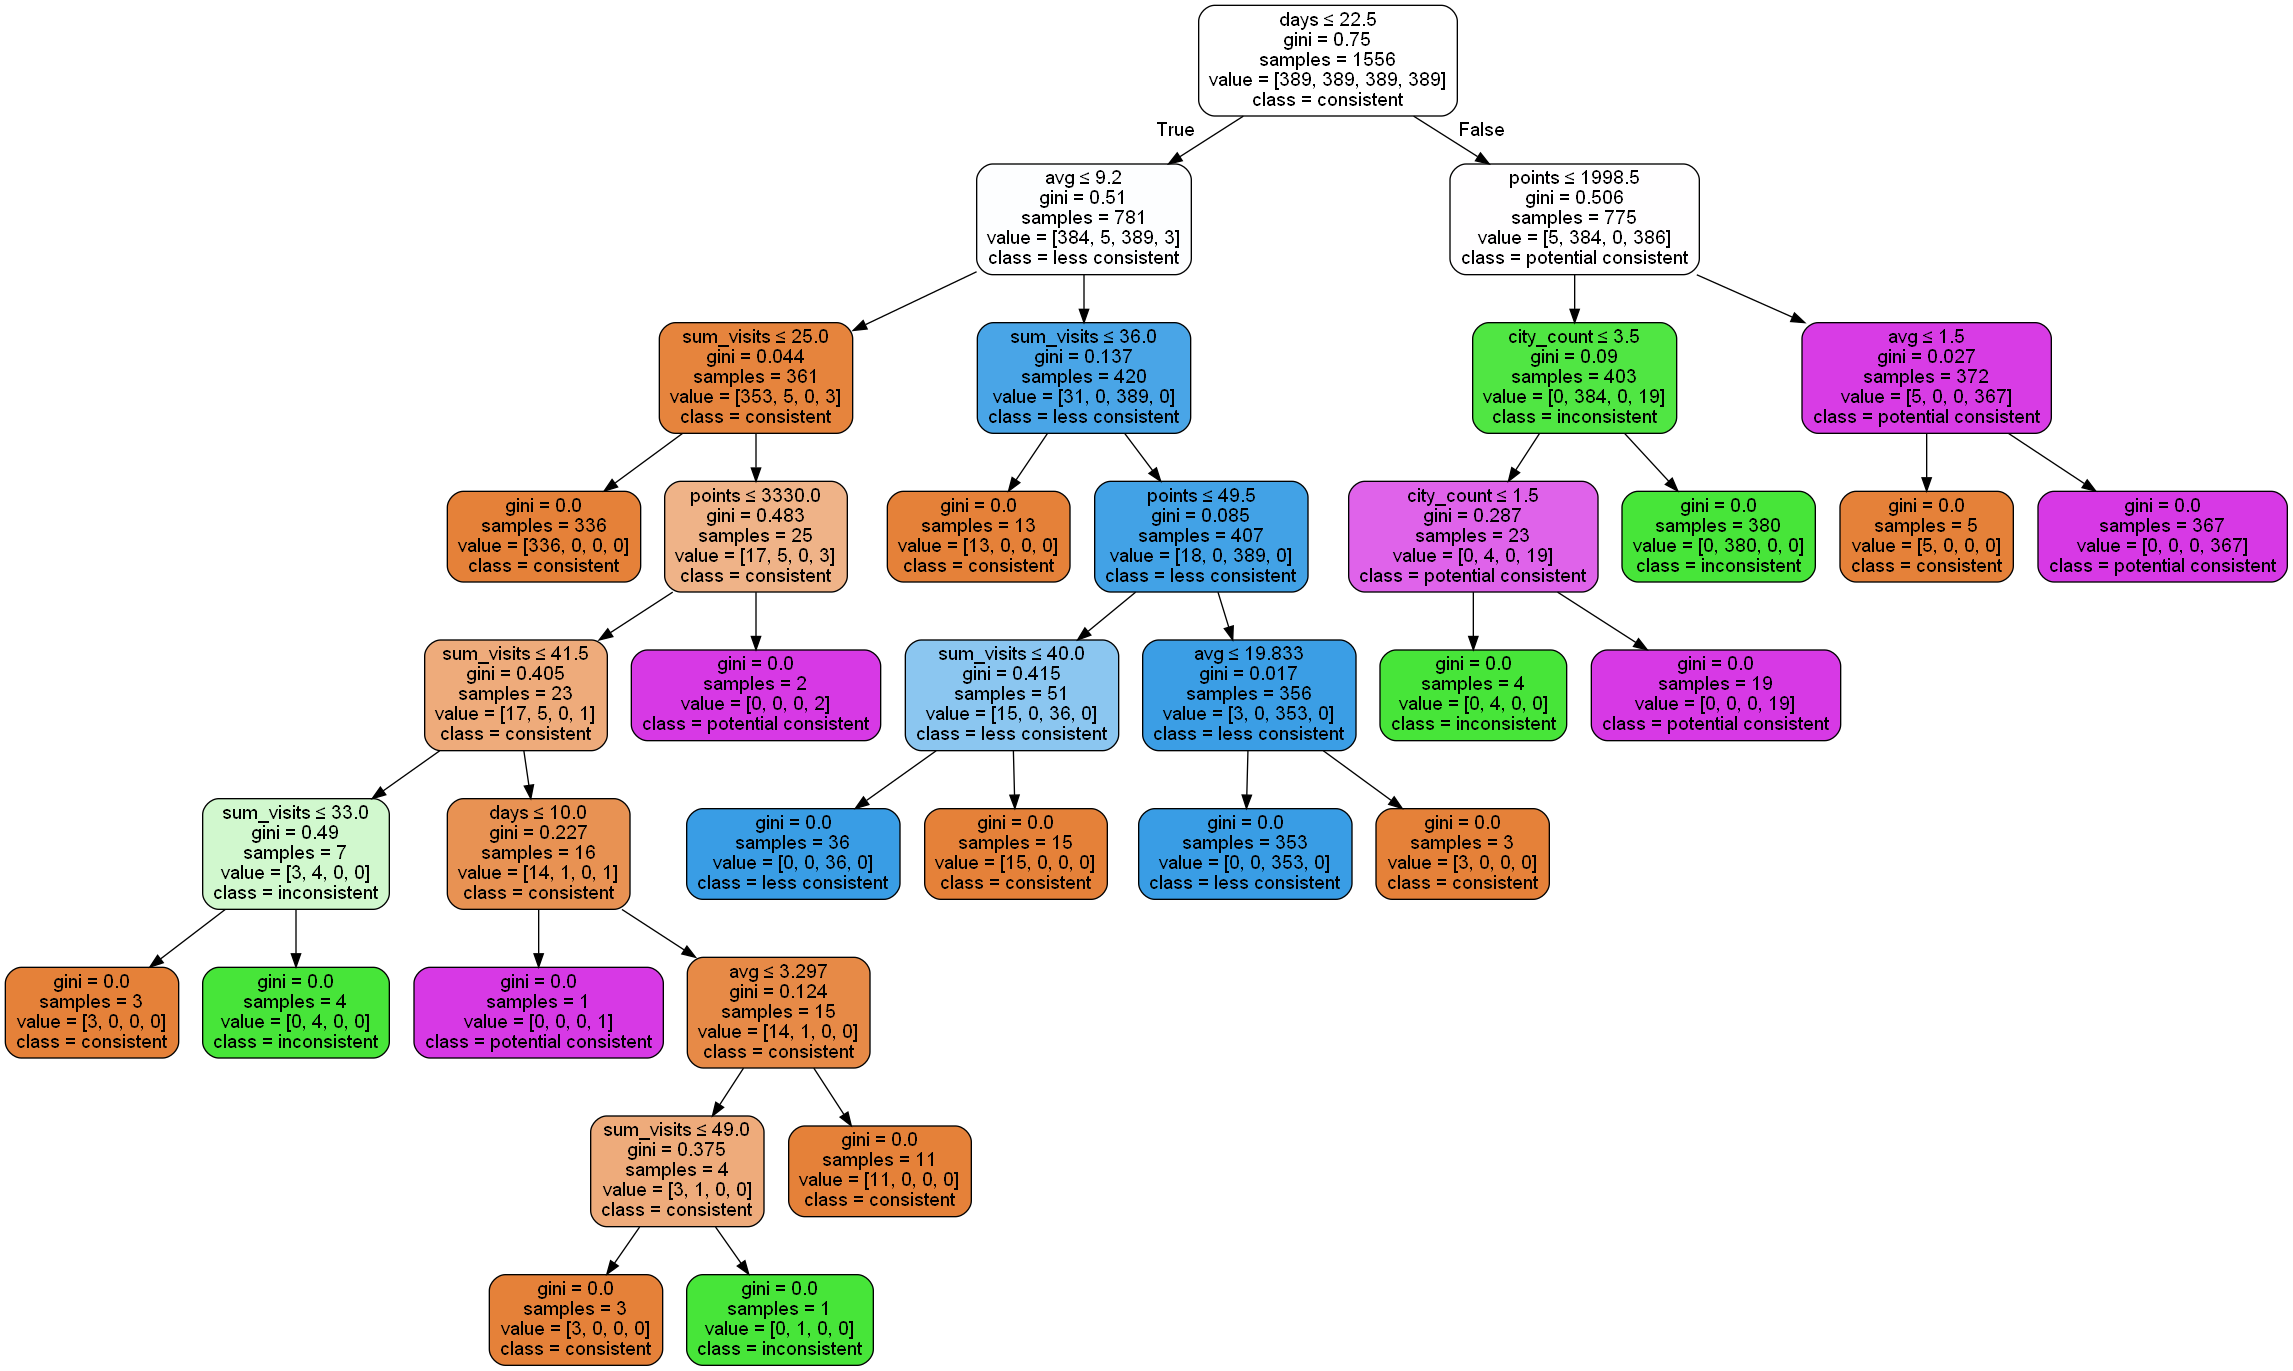

In [76]:
from io import StringIO
from IPython.display import Image  
import pydotplus
import graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                     filled=True, rounded=True,
                     feature_names=['points', 'city_count', 'sum_visits', 'days', 'avg'],
                     class_names = ['consistent', 'inconsistent', 'less consistent', 'potential consistent'],
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())